In [1]:
%load_ext autoreload
%autoreload 2

# Other procedures to generate XZ masks

In [4]:
from diffractio import plt, np
from diffractio import mm, degrees, um

from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.diffractio import Diffractio

from numpy import loadtxt

## Add thin mask

We can use a Scalar_mask_X to add it to the XZ frame. This mask can present a certain thickness but the same 'ideal' behaviour. For example, a $\pi$ phase mask can have a 0 thickness or a given thickness to obtain this phase retardation.


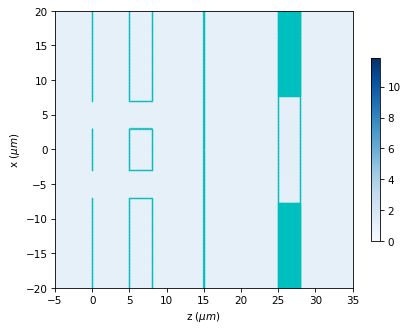

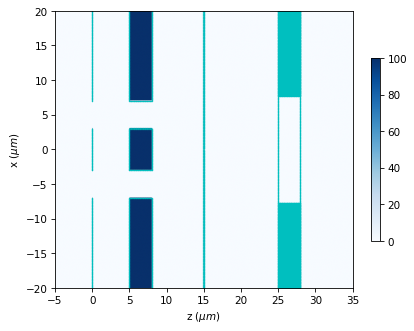

In [7]:
x0 = np.linspace(-20*um, 20*um, 1024)
z0 = np.linspace(-5*um, 35*um, 1024)
wavelength = .85*um

frame_xz = dict(x=x0, z=z0, wavelength=wavelength)
frame_x = dict(x=x0, wavelength=wavelength)

t_double_slit= Diffractio('scalar', 'mask', **frame_x)
t_double_slit.double_slit(x0=0, size=4*um, separation=10*um)

t_lens= Diffractio('scalar', 'mask', **frame_x)
t_lens.lens(x0=0, focal=100*um)

uxz = Diffractio('scalar', 'mask', **frame_xz)
uxz.add_thin_mask(t_double_slit, z0 = 0*um, h=0*um)
uxz.add_thin_mask(t_double_slit, z0 = 5*um, h=3*um)
uxz.add_thin_mask(t_lens, z0 = 15*um,   h=0*um)
uxz.add_thin_mask(t_lens, z0 = 25*um,   h=3*um)

uxz.draw_refractive_index('real', colorbar_kind='vertical', min_incr = 0.001, draw_borders=True)

uxz.draw_refractive_index('imag', colorbar_kind='vertical', min_incr = 0.001, draw_borders=True)


## Mask from two functions

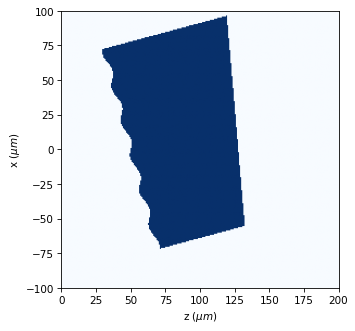

In [8]:
x0 = np.linspace(-100*um, 100*um, 256)
z0 = np.linspace(0*um, 200*um, 256)
wavelength = 0.6238*um

f1 = '50*um+2*np.sin(2*np.pi*self.X/25)'
f2 = "125*um+np.tan(10*degrees)*(self.X-0*um)"
z_sides = (-75*um, 75*um)
v_globals = {'um': 1, 'np': np}

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.mask_from_function(r0=(0*um, 0*um),
                        refractive_index=1.5,
                        f1=f1,
                        f2=f2,
                        z_sides=z_sides,
                        angle=-15*degrees,
                        r_rot = (0*um, 50*um),
                        v_globals=v_globals)

t1.draw_refractive_index(scale='scaled')


## mask from array (x,z)

(2, 512)


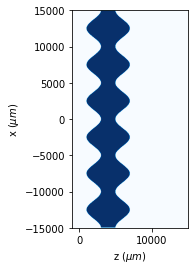

In [4]:
x = np.linspace(-15 * mm, 15 * mm, 512)
z = np.linspace(-1 * mm, 15 * mm, 512)
wavelength = 0.6328 * um

t1 = Scalar_mask_XZ(x, z, wavelength)

profile1 = np.array((x, 2*mm + 1*mm* np.cos(2*np.pi*x/(5*mm))))
profile2 = np.array((x, 6*mm - 1*mm* np.cos(2*np.pi*x/(5*mm))))
print(profile1.shape)


t1.mask_from_array(
    r0=(0 * um, 0 * um),
    refractive_index=2,
    array1=profile1 ,
    array2=profile2 , 
    x_sides=(-15 * mm, 15 * mm),
    angle=0 * degrees,
    v_globals={},
    interp_kind="quadratic",
    has_draw=False,
)

t1.draw_refractive_index(draw_borders=False, scale="scaled")

## mask from an image

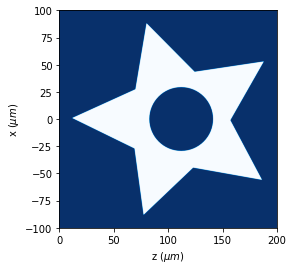

In [5]:
# TODO: change size of image to any desired.

x0 = np.linspace(-100 * um, 100 * um, 1024)
z0 = np.linspace(0 * um, 200 * um, 1024)
wavelength = 0.6238 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)

filename = "star_hole.png"
t1.image(filename=filename, n_max=2, n_min=1, angle=0 * degrees, invert=False)
t1.draw_refractive_index(scale="scaled")

## Mask from a .dxf file

<Figure size 512x256 with 0 Axes>

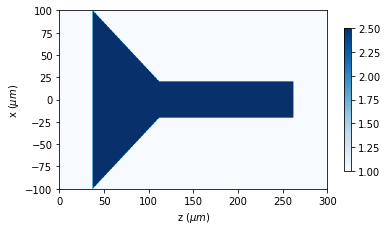

In [6]:
wavelength = 0.6328 * um

filename_dxf = "hatch_polyline2.dxf"

t0 = Scalar_mask_XZ(x=None, z=None, wavelength=wavelength)
t0.dxf(
    filename_dxf,
    n_max=2.5,
    n_min=1,
    num_pixels=(512, 256),
    units="um",
    invert=False,
    verbose=False,
)
t0.draw_refractive_index(scale="scaled", colorbar_kind="vertical")

## mask from several surfaces

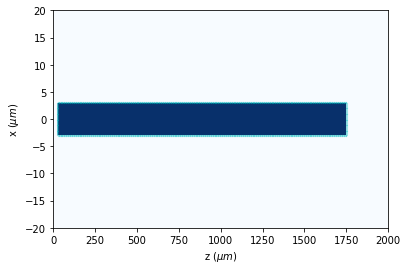

In [7]:
x0 = np.linspace(-20 * um, 20 * um, 256)
z0 = np.linspace(0 * um, 2000 * um, 512)
wavelength = 2 * um

r0 = (0 * um, 0 * um)
refractive_index = 4
Fs = ["Xrot<3*um", "Xrot>-3*um", "Zrot>25*um", "Zrot<1750*um"]
t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

t1.object_by_surfaces(r0, refractive_index, Fs, angle=0 * degrees, v_globals={})

t1.draw_refractive_index(draw_borders=True)

## refractive index from functions

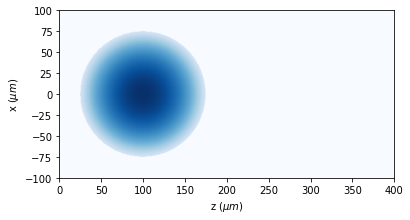

In [8]:
x0 = np.linspace(-100 * um, 100 * um, 256)
z0 = np.linspace(0 * um, 400 * um, 512)

wavelength = 0.5 * um

t0 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1.0)

pn = dict(n_out=1.5, n_center=4, cx=0 * um, cz=100 * um, radius=75 * um)

center = (pn["cx"], pn["cz"])
radius = pn["radius"]
# ref_index = '2*(((X-0)**2+(Z-300)**2)/75**2-0)'
ref_index = "{p[n_out]}+({p[n_center]}-{p[n_out]})*(1-((X-{p[cx]})**2+(Z-{p[cz]})**2)/{p[radius]}**2)".format(
    p=pn
)

t0.cylinder(r0=center, radius=(radius, radius), refractive_index=ref_index, angle=0)

t0.draw_refractive_index(draw_borders=False, scale="scaled")

## xz mask from a x mask

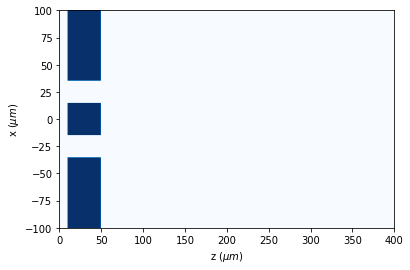

In [9]:
x0 = np.linspace(-100 * um, 100 * um, 256)
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = 0.55 * um

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.double_slit(x0=0, size=20 * um, separation=50 * um)

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
z0 = 10 * um
z1 = 50 * um

v_globals = dict(z0=z0, z1=z1)

t1.extrude_mask(t=t0, z0=z0, z1=z1, refractive_index=1.5, v_globals=v_globals)

t1.draw_refractive_index(draw_borders=False)

## xz mask from a xy mask

There are many masks defined in the XY frame. We can use them using the 'refractive_index_from_scalar_mask_XY' method.

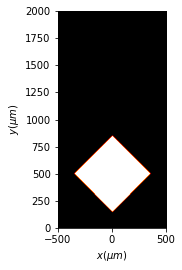

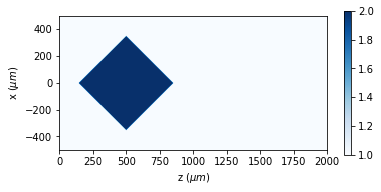

In [10]:
from diffractio.scalar_masks_XY import Scalar_mask_XY

x = np.linspace(-500 * um, 500 * um, 256)
y = z = np.linspace(0 * um, 2 * mm, 512)

wavelength = 0.6328 * um

mask_xy = Scalar_mask_XY(x, y, wavelength)
mask_xy.square(r0=(0, 500 * um), size=500 * um, angle=45 * degrees)
mask_xy.draw()

mask_xz = Scalar_mask_XZ(x, z, wavelength=wavelength, n_background=1)
mask_xz.refractive_index_from_scalar_mask_XY(mask_xy, 2 + 0.02j)
mask_xz.draw_refractive_index(
    draw_borders=False, scale="scaled", colorbar_kind="vertical"
)

## Variable refractive index

### z direction

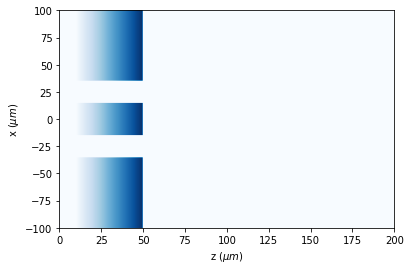

In [11]:
# In this example the variation is in z

x0 = np.linspace(-100 * um, 100 * um, 256)
z0 = np.linspace(0 * um, 200 * um, 512)
wavelength = 0.55 * um

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.double_slit(x0=0, size=20 * um, separation=50 * um)

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
z0 = 10 * um
z1 = 50 * um
v_globals = dict(z0=z0, z1=z1)
t1.extrude_mask(
    t=t0, z0=z0, z1=z1, refractive_index="1+0.25*(z-z0)/(z1-z0)", v_globals=v_globals
)
t1.draw_refractive_index(
    draw_borders=False,
)

### x direction

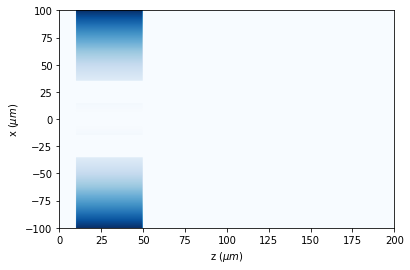

In [12]:
x0 = np.linspace(-100 * um, 100 * um, 256)
z0 = np.linspace(0 * um, 200 * um, 512)
wavelength = 0.5 * um

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.double_slit(x0=0, size=20 * um, separation=50 * um)

z_min = 10 * um
z_max = 50 * um
v_globals = dict(np=np)
t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
t1.extrude_mask(
    t=t0,
    z0=z_min,
    z1=z_max,
    refractive_index="1+0.25*np.abs(x/200)**2",
    v_globals=v_globals,
)
t1.draw_refractive_index(draw_borders=False)

### discretize_refractive_index

Dx=0.78 um


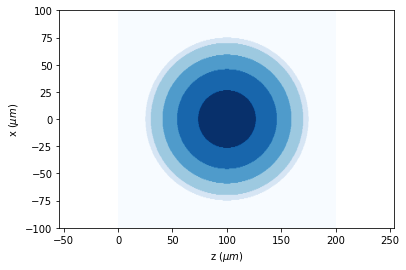

In [13]:
x0 = np.linspace(-100 * um, 100 * um, 256)
z0 = np.linspace(0 * um, 200 * um, 512)
wavelength = 50 * um

print("Dx={:2.2f} um".format(x0[1] - x0[0]))

t0 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1.0)

pn = dict(n_out=1.5, n_center=4, cx=0 * um, cz=100 * um, radius=75 * um)

center = (pn["cx"], pn["cz"])
radius = pn["radius"]
# ref_index = '2*(((X-0)**2+(Z-300)**2)/75**2-0)'
ref_index = "{p[n_out]}+({p[n_center]}-{p[n_out]})*(1-((X-{p[cx]})**2+(Z-{p[cz]})**2)/{p[radius]}**2)".format(
    p=pn
)

t0.cylinder(r0=center, radius=(radius, radius), refractive_index=ref_index, angle=0)

t0.discretize_refractive_index(num_layers=5)

t0.draw_refractive_index(draw_borders=False, scale="equal")

## Adding masks
Complex structures can be performed by adding different masks.

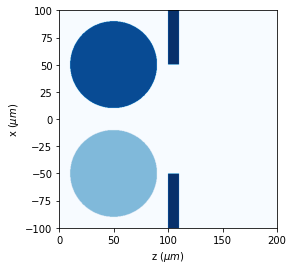

In [14]:
x = np.linspace(-100*um, 100*um, 512)
z = np.linspace(0*um, 200*um, 512)
wavelength = 0.6328 * um

t1 = Scalar_mask_XZ(x, z, wavelength)
t1.cylinder(r0=(-50 * um, 50 * um), radius=(40 * um, 40 * um), refractive_index = 1.5, angle=0 * degrees)
t1.cylinder(r0=(+50 * um, 50 * um), radius=(40 * um, 40 * um), refractive_index = 2, angle=0 * degrees)
t1.slit(
        r0=(0 * um, 100*um),
        aperture=100 * um,
        depth=10 * um,
        refractive_index=1.5 + 1.5j,
        refractive_index_center="",
        angle=0 * degrees,
)

t1.draw_refractive_index(scale='scaled')

This masks can overlap to generate complex structures.

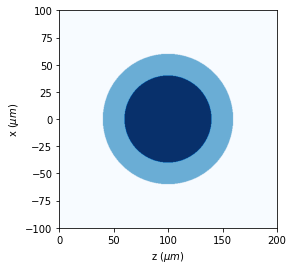

In [15]:
x = np.linspace(-100*um, 100*um, 512)
z = np.linspace(0*um, 200*um, 512)
wavelength = 0.6328 * um

t1 = Scalar_mask_XZ(x, z, wavelength)
t1.cylinder(r0=(0 * um, 100 * um), radius=60*um, refractive_index = 1.5, angle=0 * degrees)
t1.cylinder(r0=(0 * um, 100 * um), radius=40*um, refractive_index = 2, angle=0 * degrees)


t1.draw_refractive_index(scale='scaled')

## Substracting masks

In the same way, substracting mask is simple, just place a mask with the hole whose refractive index is the same than the background

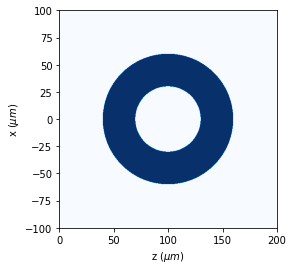

In [16]:
x = np.linspace(-100*um, 100*um, 512)
z = np.linspace(0*um, 200*um, 512)
wavelength = 0.6328 * um
n_background=1

t1 = Scalar_mask_XZ(x, z, wavelength, n_background=n_background)
t1.cylinder(r0=(0 * um, 100 * um), radius=60*um, refractive_index = 1.5, angle=0 * degrees)
t1.cylinder(r0=(0 * um, 100 * um), radius=30*um, refractive_index = n_background, angle=0 * degrees)


t1.draw_refractive_index(scale='scaled')

## Insert_array_masks
The mask is repited in x-z axis separated a certain distance

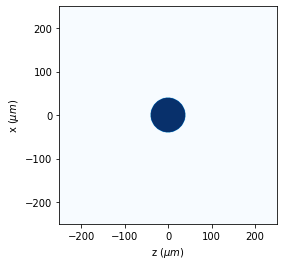

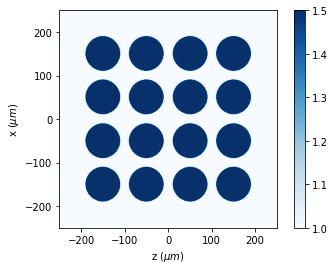

In [17]:
x = np.linspace(-250 * um, 250 * um, 512)
z = np.linspace(-250 * um, 250 * um, 512)
wavelength = 1 * um

s = Scalar_mask_XZ(x, z, wavelength)
s.cylinder(r0=(0 * um, 0 * um), radius=40*um, refractive_index = 1.5, angle=0 * degrees)
s.draw_refractive_index(scale='scaled') # -> passar a s.draw(kind='refractive_index')

txz= Scalar_mask_XZ(x, z, wavelength)
txz.insert_array_masks(
    txz=s, refractive_index=1.5, space=[100 * um, 100 * um], margin=0 * um, angle=0 * degrees)
txz.draw_refractive_index(scale='scaled')
plt.colorbar()

## repeat_structure

The mask si repeated (n,m) times. The size of the new mask is (n,m) times greater.

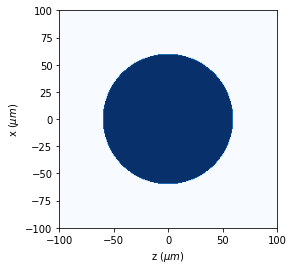

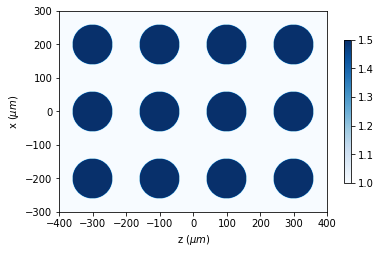

In [18]:
size = 200 * um
x0 = np.linspace(-size / 2, size / 2, 256)
z0 = np.linspace(-size / 2, size / 2, 256)
wavelength = 0.6328 * um

t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.cylinder(r0=(0 * um, 0 * um), radius=60*um, refractive_index = 1.5, angle=0 * degrees)
t1.draw_refractive_index(scale='scaled')

cylinders = t1.repeat_structure(
    num_repetitions=(3, 4), position="center", new_field=True
)
cylinders.draw_refractive_index(scale='scaled', colorbar_kind='vertical')

In [19]:
print(t1)

Scalar_mask_XZ
 - x:  (256,),   z:  (256,),   u:  (256, 256)
 - xmin:       -100.00 um,  xmax:      100.00 um,  Dx:   0.78 um
 - zmin:       -100.00 um,  zmax:      100.00 um,  Dz:   0.78 um
 - nmin:       1.00+0.00j,     nmax:      1.50+0.00j
 - Imin:       0.00,     Imax:      0.00
 - phase_min:  0.00 deg, phase_max: 0.00 deg
 - wavelength: 0.63 um
 - date:       2024-11-08_15_44_44



In [20]:
print(cylinders)

Scalar_mask_XZ
 - x:  (768,),   z:  (1024,),   u:  (1024, 768)
 - xmin:       -300.00 um,  xmax:      300.00 um,  Dx:   0.78 um
 - zmin:       -400.00 um,  zmax:      400.00 um,  Dz:   0.78 um
 - nmin:       1.00+0.00j,     nmax:      1.50+0.00j
 - Imin:       0.00,     Imax:      0.00
 - phase_min:  0.00 deg, phase_max: 0.00 deg
 - wavelength: 0.63 um
 - date:       2024-11-08_15_44_44

